## Module 4:

## Team Members:
Esther Akinade & Cary Worrall
## Project Title:
Predictions of Ebola Cases: Sierra Leone 2014



## Project Goal:
This project aims to predict possible future Ebola cases during the 2014 epidemic in Sierra Leone using the cumulative SIR model and Euler’s method. 

## Disease Background:

Using your assigned disease, fill in the following bullet points. 
Using your assigned disease, fill in the following bullet points. 
Ebola in Sierra Leone 

* Prevalence & incidence
Between the years of 2014 to 2016, West African had an high incidence of cases, over 28,000 total cases were reported and 11,300 deaths. In Sierra Leone ther were a total of 17,318 cases of ebola virus dieases. There was also a total of 2536 deaths and 886 recoveries that were reported. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC5528867/#:~:text=RESULTS,female%20cases%20(Table%201)
https://pmc.ncbi.nlm.nih.gov/articles/PMC4930947/

* Economic burden
The ebola epidemic had devasting impact on the economic burden on Guinea, Liberia, and Sierra Leone. There was an estimated $2.2 billion lost in the gross domestic product of the three countries. Additionally, it lowered investment and was a big loss in private sector. There was a loss in the agricultural production with led to food security and there was a restirction on moving goods across the border. In Sierra Leone, there was a deficit of about 3.10% of the GDP and the government budget averaged -4.46% of the GDP.
https://pmc.ncbi.nlm.nih.gov/articles/PMC7123237/#:~:text=The%20Ebola%20epidemic%20had%20a,1999%20(World%20Bank%202016).

* Risk factors (genetic, lifestyle) & Societal determinants
According to the "Host genetic Diversity" study, it indicates that genetic backgronds determine if a person is susceptiable to Ebola and it also determines the severity of the disease. Some lifestyle risk factors include contact with infcted fluids (blood, urine, feces, saliva, etc.) of infected person or animal. This can come from handling and butchering animals and caregiving of an infected person. Additionally, living or traveling in the infected areas where Ebola is prevalent high. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC4241145/
https://www.cdc.gov/ebola/about/index.html#:~:text=Risk%20factors,Reading%20How%20Ebola%20Disease%20Spreads

* Symptoms
The symptoms of the ebola disease are possible appear 2 to 21 days after contact, and on average, people show symptoms 8 to 10 days after exposure. Some dry symptoms include fever, aches and pains in the muscles and joint, serve headaches, weakness and fatigue, and sore throat. Later,"wet", symptoms, 4-5 days of the illness include loss of appetite, unexplained bleeding, nausea, abdominal pain, diarrha, and vomiting. Other symptoms include chest pain, shortness of breath, confusion, red eyes, skin rash, hiccups, and seizures. 
https://www.cdc.gov/ebola/signs-symptoms/index.html

* Diagnosis
Reverse transcription polymerase chain reaction (RT-PCR) is used in the case of diagnosing Ebola, which helps detect the virus's genetic material in the blood sample. Some other test include antibody and antigen test. The antibody test detects the patient's immune response to the virus, while the antigen test detects specific viral proteins. 
https://pmc.ncbi.nlm.nih.gov/articles/PMC9995846/#:~:text=Reverse%20transcription%E2%80%93polymerase%20chain%20reaction,be%20purified%20by%20extraction%20steps.
https://pmc.ncbi.nlm.nih.gov/articles/PMC5653233/#:~:text=Patient%20samples%20are%20tested%20either,2015

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

Cell and Molecular Physiology: 
- Ebola enters cell by attachement and endocytosis
        - entry: viral glycoprotien(GP) binding to the host cell receptor, which triggering the cell to engulf the virus through macropinocytosis
        - inside the cell: the viral RNA is relased and replicated. The virus suppresses the host's immune response and causes cell and tissue damage 
        https://pmc.ncbi.nlm.nih.gov/articles/PMC4495366/#:~:text=Virus%20entry,and%20macropinocytosis%20(Figure%202).
Anatomy and Organ Physiology 
- Immune Suppression: ebola virus suppressing the host's immune response by preventing interferon production and signaling 
- Liver Damage: the virus destroys liver cells(hepatocytes), which leads to the leakage of liver enzymes into the blood, which inhibits the liver to clear the virus and produce clotting factors. 
- Vascular damage: the viral damage increases the permeability of blood vessels, leads to internal bleedinf and hemorrhaging 
- Kidney dsyfunction: the virus damages renal tubular cells and the glomerular epithelium leading to kidney function. 
https://www.abeomics.com/ebola-virus-pathogenesis#:~:text=During%20infection%2C%20monocytes%20/macrophages%20in,normally%20functions%20in%20cell%20communication.


## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

The data set that I will be analyzing Ebola cases is from Human Data by the World Health Organization. The data was collected from multiple locations, such as Italy, Liberia, Mali, Nigeria, Sierra Leone, and much more. The time period of the dataset is from August 29,2014 to March 23, 2016. 

         date  confirmed_cases
0  2014-08-29           1026.0
1  2014-09-05           1261.0
2  2014-09-08           1361.0
3  2014-09-12           1424.0
4  2014-09-16           1620.0
        date  confirmed_cases  new_cases   I_est  R_est      S_est
0 2014-08-29           1026.0     1026.0  1026.0    0.0  6874974.0
1 2014-09-05           1261.0      235.0  1261.0    0.0  6874739.0
2 2014-09-08           1361.0      100.0  1361.0    0.0  6874639.0
3 2014-09-12           1424.0       63.0  1424.0    0.0  6874576.0
4 2014-09-16           1620.0      196.0  1620.0    0.0  6874380.0


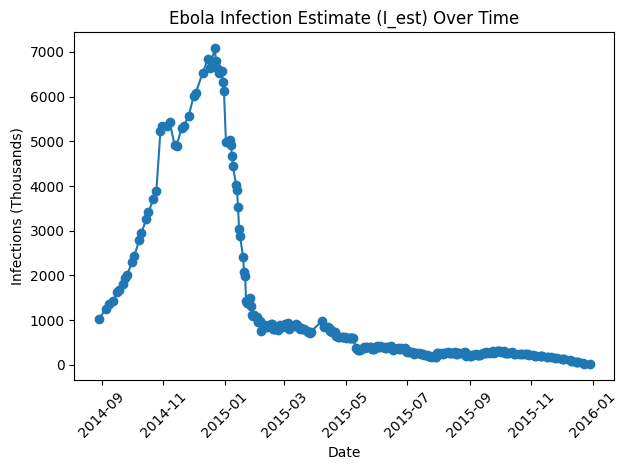

In [1]:
## LOAD YOUR DATASET HERE.
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Ebola Sierra Leone dataset
df = pd.read_csv("ebola_sierra_leone_data_2014_2015_cumulative.csv")
print(df.head())   # show first few rows

# Ensure date column is actual datetime
df['date'] = pd.to_datetime(df['date'])

# 2. Convert cumulative cases to S, I, R estimates
N = 6876000   # population in thousands 

data_sir = convert_cumulative_to_SIR(
    df,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=N,
    infectious_period=21,
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)

# Convert to thousands for plotting
data_sir['I_est'] = data_sir['I_est'] 

print(data_sir.head())  # confirm values look correct

# 3. Plot S, I, R over time
plt.plot(data_sir['date'], data_sir['I_est'], marker='o')

plt.xlabel('Date')
plt.ylabel('Infections (Thousands)')
plt.title('Ebola Infection Estimate (I_est) Over Time')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

#### 1. Fitting the SIR Model

In [2]:
# Using the euler_SIR function defined earlier, we can simulate the SIR model over time.
from main_functions import euler_sir
from scipy.optimize import minimize


# Set up observed arrays
I_obs = data_sir['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))

I0_obs = data_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = N- I0_obs - R0_obs

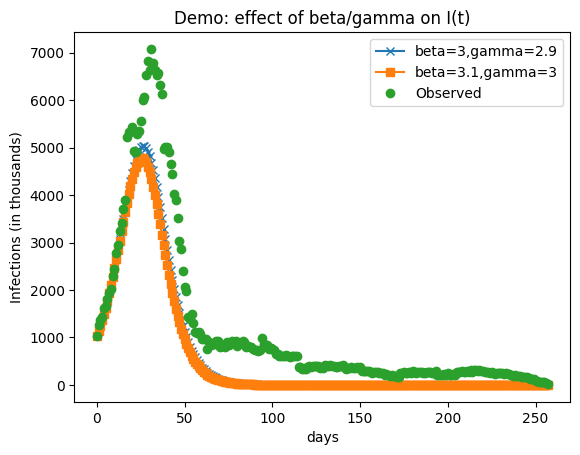


 OPTIMIZATION RESULTS
Fitted beta : 0.8389528849394581
Fitted gamma: 0.8742334900176264
Minimum SSE : nan


C:\Users\esthe\AppData\Local\Temp\ipykernel_12756\4280652065.py:25: RuntimeWarning: overflow encountered in square
  return np.mean((I_pred - I_obs)**2)


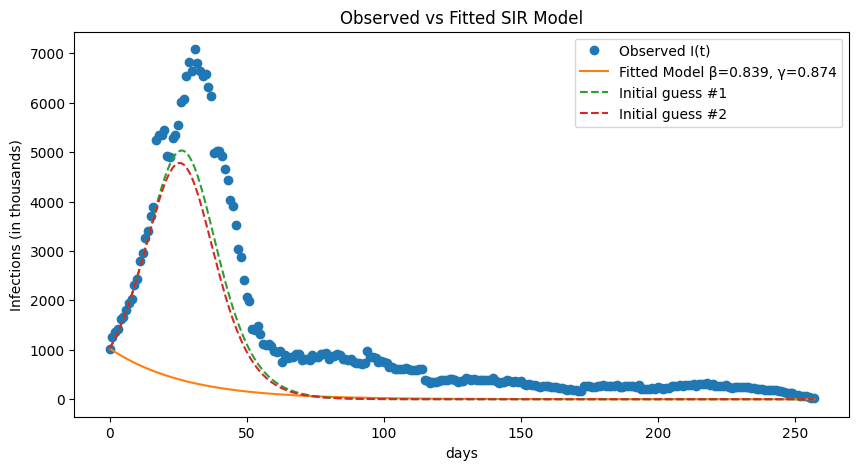


Final fitted SSE: 3766595.3102331096


In [10]:
# Plug in guesses for gamma and beta, plot the model predictions against the data, and calculate SSE.

beta1 = 3 #random guess for beta
gamma1 = 2.9 #random guess for gamma
beta2 = 3.1 #alternative guesses
gamma2 = 3 #alternative guesses

S1, I1, R1 = euler_sir(beta1, gamma1, S0_obs, I0_obs, R0_obs, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in thousands)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

# Optimization: 
def SSE(params):
    beta, gamma = params
    S_pred, I_pred, R_pred = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, N)
    return np.mean((I_pred - I_obs)**2)

initial_guess = [0.2, 0.1]   # starting point
bounds = [(0.0001, 5), (0.0001, 2)]  # sensible parameter ranges

result = minimize(SSE, initial_guess, bounds=bounds, method='L-BFGS-B')

beta_hat, gamma_hat = result.x
print("\n=======================")
print(" OPTIMIZATION RESULTS")
print("=======================")
print("Fitted beta :", beta_hat)
print("Fitted gamma:", gamma_hat)
print("Minimum SSE :", result.fun)

S_fit, I_fit, R_fit = euler_sir(beta_hat, gamma_hat, S0_obs, I0_obs, R0_obs, t_obs, N)
plt.figure(figsize=(10,5))

plt.plot(t_obs, I_obs, 'o', label='Observed I(t)')
plt.plot(t_obs, I_fit, '-', label=f'Fitted Model β={beta_hat:.3f}, γ={gamma_hat:.3f}')
plt.plot(t_obs, I1, '--', label='Initial guess #1')
plt.plot(t_obs, I2, '--', label='Initial guess #2')

plt.xlabel('days')
plt.ylabel('Infections (in thousands)')
plt.title('Observed vs Fitted SIR Model')
plt.legend()
plt.show()

print("\nFinal fitted SSE:", np.mean((I_fit - I_obs)**2))




In [11]:
# Use an optimization routine to minimize SSE and find the best-fitting parameters.
print("SSE (beta1,gamma1):", np.mean((I1 - I_obs)**2))
print("SSE (beta2,gamma2):", np.mean((I2 - I_obs)**2))

SSE (beta1,gamma1): 581123.1770419362
SSE (beta2,gamma2): 716915.0847371365


#### 2. Predict "the future" with your fit SIR model


 FIT ON FIRST HALF OF DATA
beta_half  = 2.079408303726388
gamma_half = 2.0
SSE_half   = 986658.0382587072


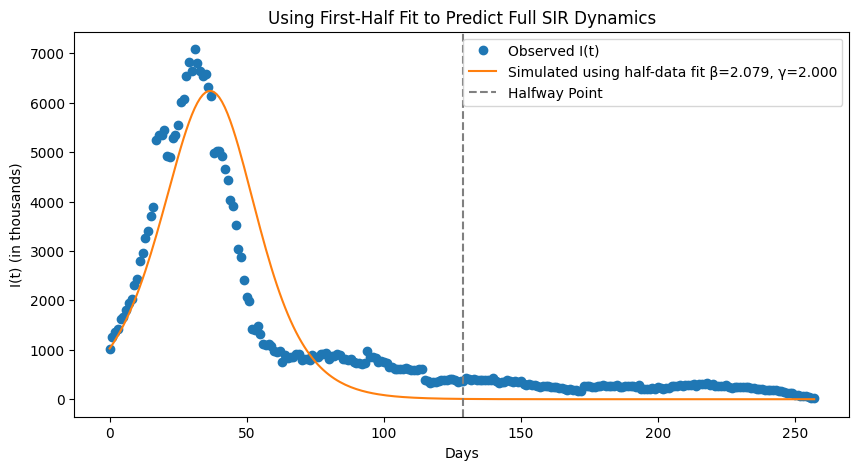

In [12]:
#1. Split into first half of data
n_half = len(I_obs) // 2

I_obs_first = I_obs[:n_half]
t_first = np.linspace(0, len(I_obs_first)-1, len(I_obs_first))

I0_first = I_obs_first[0]
R0_first = 0.0
S0_first = N - I0_first - R0_first

# 2. Define the SSE function for first-half fitting
def SSE_first(params):
    beta, gamma = params
    
    # Reject invalid parameter regions
    if beta <= 0 or gamma <= 0:
        return 1e12

    try:
        S_pred, I_pred, R_pred = euler_sir(
            beta, gamma,
            S0_first, I0_first, R0_first,
            t_first, N
        )
    except:
        # If solver or code crashes: huge penalty
        return 1e12

    # If Euler produced NaN or Inf → penalize
    if np.any(np.isnan(I_pred)) or np.any(np.isinf(I_pred)):
        return 1e12
    
    # If model values explode unrealistically → penalize
    if np.max(I_pred) > 1e9:  
        return 1e12

    return np.mean((I_pred - I_obs_first)**2)

# 3. Optimize using first-half only
initial_guess = [0.2, 0.1]
bounds = [(0.0001, 5), (0.0001, 2)]

result_first = minimize(SSE_first, initial_guess, bounds=bounds, method='L-BFGS-B')

beta_half, gamma_half = result_first.x

print("\n==============================")
print(" FIT ON FIRST HALF OF DATA")
print("==============================")
print("beta_half  =", beta_half)
print("gamma_half =", gamma_half)
print("SSE_half   =", result_first.fun)

# 4. Simulate forward over FULL dataset using the half-fit parameters
S_full_fit, I_full_fit, R_full_fit = euler_sir(
    beta_half,
    gamma_half,
    S0_obs,     # initial S from full dataset
    I0_obs,     # initial I from full dataset
    R0_obs,
    t_obs,      # full time array
    N
)

# 5. Plot predicted full trajectory vs real data
plt.figure(figsize=(10,5))

plt.plot(t_obs, I_obs, 'o', label='Observed I(t)')
plt.plot(t_obs, I_full_fit, '-', label=f'Simulated using half-data fit β={beta_half:.3f}, γ={gamma_half:.3f}')

plt.axvline(n_half, color='gray', linestyle='--', label='Halfway Point')

plt.xlabel('Days')
plt.ylabel('I(t) (in thousands)')
plt.title('Using First-Half Fit to Predict Full SIR Dynamics')
plt.legend()
plt.show()

**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

No, it was not close to what we found on the full dataset. It is a much better fit. The SSE calculated for the second half of the data 6826331.467279227. 

In [13]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.
# Second-half observed data
I_obs_second = I_obs[n_half:]
t_second = np.linspace(0, len(I_obs_second)-1, len(I_obs_second))

# Initial conditions for second half:
I0_second = I_obs_second[0]
R0_second = R0_obs              # still zero because your R_est=0 in dataset
S0_second = N - I0_second - R0_second

# Simulate SIR starting at beginning of second half
S_second_pred, I_second_pred, R_second_pred = euler_sir(
    beta_half,
    gamma_half,
    S0_second,
    I0_second,
    R0_second,
    t_second,
    N
)

# Compute SSE on second half ONLY
SSE_second_half = np.mean((I_second_pred - I_obs_second)**2)

print("\n==============================")
print(" SSE ON SECOND HALF OF DATA")
print("==============================")
print("β (from first half) =", beta_half)
print("γ (from first half) =", gamma_half)
print("SSE (second half)   =", SSE_second_half)


 SSE ON SECOND HALF OF DATA
β (from first half) = 2.079408303726388
γ (from first half) = 2.0
SSE (second half)   = 6826331.467279227



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

The midpoint method would predict a lower numerical error because the slope is evalueted halfway through the interval, which means btter approximation of the average slope. 

#### 3. Decreasing numerical error with the RK4 Method


  OPTIMIZATION RESULTS USING solve_ivp
Fitted beta (RK45):   2.081927546871161
Fitted gamma (RK45):  2.0
Minimum SSE (RK45):   441431.13739595003


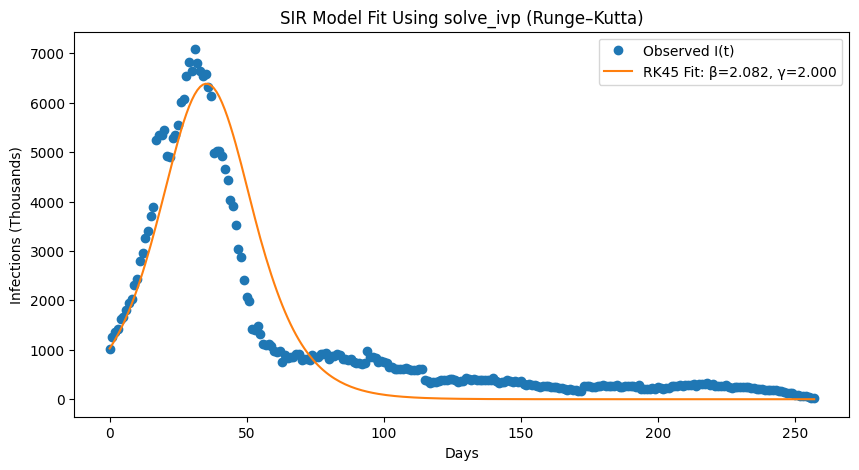

In [14]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define SIR ODE system
# -----------------------------
def SIR_ODE(t, y, beta, gamma, N):
    S, I, R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]


# -----------------------------
# 2. Wrapper to simulate SIR using solve_ivp
# -----------------------------
def simulate_sir_ivp(beta, gamma, S0, I0, R0, t_eval, N):
    sol = solve_ivp(
        fun=lambda t, y: SIR_ODE(t, y, beta, gamma, N),
        t_span=(t_eval[0], t_eval[-1]),
        y0=[S0, I0, R0],
        t_eval=t_eval,
        method="RK45"
    )
    return sol.y  # returns (S(t), I(t), R(t))


# -----------------------------
# 3. Define SSE function for optimization
# -----------------------------
def SSE_ivp(params):
    beta, gamma = params
    
    # Reject invalid parameter ranges
    if beta <= 0 or gamma <= 0:
        return 1e12

    try:
        S_pred, I_pred, R_pred = simulate_sir_ivp(
            beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, N
        )
    except:
        return 1e12
    
    # Handle any numerical failures
    if np.any(np.isnan(I_pred)) or np.any(np.isinf(I_pred)):
        return 1e12

    return np.mean((I_pred - I_obs)**2)


# -----------------------------
# 4. Optimize β and γ using RK45 solver
# -----------------------------
initial_guess = [0.2, 0.1]
bounds = [(0.0001, 5), (0.0001, 2)]

result_ivp = minimize(SSE_ivp, initial_guess, bounds=bounds, method='L-BFGS-B')

beta_ivp, gamma_ivp = result_ivp.x

print("\n========================================")
print("  OPTIMIZATION RESULTS USING solve_ivp")
print("========================================")
print("Fitted beta (RK45):  ", beta_ivp)
print("Fitted gamma (RK45): ", gamma_ivp)
print("Minimum SSE (RK45):  ", result_ivp.fun)


# -----------------------------
# 5. Simulate with fitted RK45 parameters
# -----------------------------
S_ivp, I_ivp, R_ivp = simulate_sir_ivp(
    beta_ivp, gamma_ivp, S0_obs, I0_obs, R0_obs, t_obs, N
)

# -----------------------------
# 6. Plot Results
# -----------------------------
plt.figure(figsize=(10,5))

plt.plot(t_obs, I_obs, 'o', label='Observed I(t)')
plt.plot(t_obs, I_ivp, '-', label=f'RK45 Fit: β={beta_ivp:.3f}, γ={gamma_ivp:.3f}')

plt.xlabel("Days")
plt.ylabel("Infections (Thousands)")
plt.title("SIR Model Fit Using solve_ivp (Runge–Kutta)")
plt.legend()
plt.show()

Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?

Yes, the RK4 did a better job compaared to the Euler's method because it is an higeher-order method with smaller numerical erors, while the Euler's large step-size add errors over time making worse. 




 SSE ON SECOND HALF OF DATA
Euler SSE (first-half fit): 6826331.4673
RK45 SSE (full-data fit)   : 7186771.1822


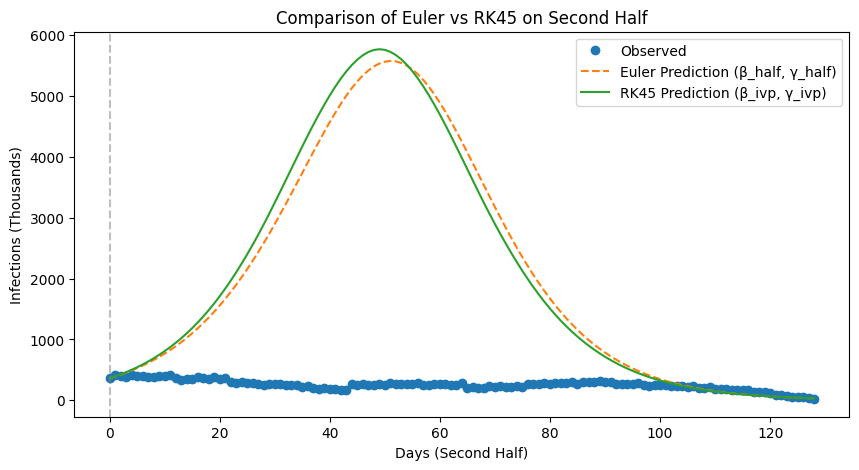

In [15]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.
# -----------------------------
# 1. Define second-half data
# -----------------------------
I_obs_second = I_obs[n_half:]
t_second = np.linspace(0, len(I_obs_second)-1, len(I_obs_second))

# Initial conditions for second half
I0_second = I_obs_second[0]
R0_second = R0_obs            # still 0
S0_second = N - I0_second - R0_second

# -----------------------------
# 2. Euler prediction on second half
# -----------------------------
S_euler_second, I_euler_second, R_euler_second = euler_sir(
    beta_half, gamma_half,
    S0_second, I0_second, R0_second,
    t_second, N
)

SSE_euler_second = np.mean((I_euler_second - I_obs_second)**2)

# -----------------------------
# 3. RK45 prediction on second half
# -----------------------------
S_rk45_second, I_rk45_second, R_rk45_second = simulate_sir_ivp(
    beta_ivp, gamma_ivp,
    S0_second, I0_second, R0_second,
    t_second, N
)

SSE_rk45_second = np.mean((I_rk45_second - I_obs_second)**2)

# -----------------------------
# 4. Print comparison
# -----------------------------
print("\n========================================")
print(" SSE ON SECOND HALF OF DATA")
print("========================================")
print(f"Euler SSE (first-half fit): {SSE_euler_second:.4f}")
print(f"RK45 SSE (full-data fit)   : {SSE_rk45_second:.4f}")

# -----------------------------
# 5. Optional plot comparison
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(t_second, I_obs_second, 'o', label='Observed')
plt.plot(t_second, I_euler_second, '--', label='Euler Prediction (β_half, γ_half)')
plt.plot(t_second, I_rk45_second, '-', label='RK45 Prediction (β_ivp, γ_ivp)')

plt.axvline(0, color='gray', linestyle='--', alpha=0.5)  # start of second half
plt.xlabel('Days (Second Half)')
plt.ylabel('Infections (Thousands)')
plt.title('Comparison of Euler vs RK45 on Second Half')
plt.legend()
plt.show()

#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?
We chose to implement the inclusion of an exposed compartment (SEIR model) because the basic SIR model assume people becomes infectious immediately upon infiection; however, ebola has a 2-21 day incubation period where people are infected but not yet contagious. The SEIR model adds an "Exposed" (E) compartment to shows the delay, which would improve the fit. Yes, this fits better than the fitted SIR data. 

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



Initial E0 chosen as: 2052.0

       SEIR OPTIMIZATION RESULTS
Fitted beta  : 0.0001
Fitted sigma : 0.18082117422522104
Fitted gamma : 0.010616852026573288
Minimum SSE  : 1456791.3574694397


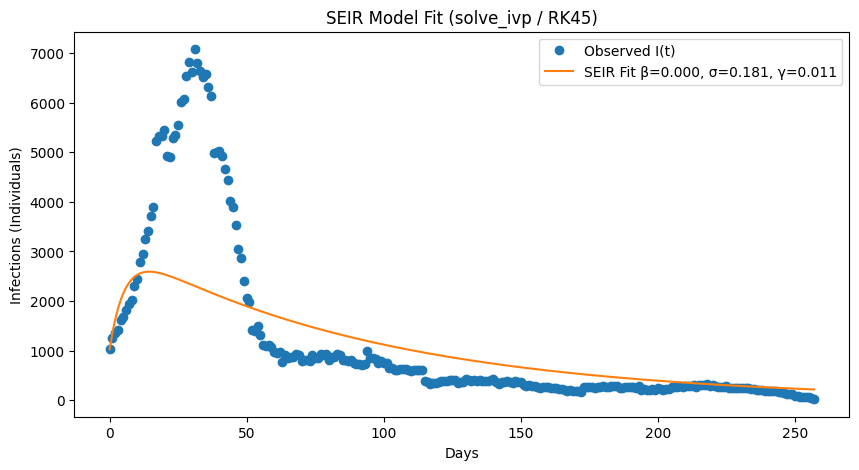


Final SSE (SEIR): 1456791.3574694397


In [16]:
# Extended model implementation, parameter fitting, and plotting.

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. SEIR ODE System
# ------------------------------------------------------------
def SEIR_ODE(t, y, beta, sigma, gamma, N):
    S, E, I, R = y
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    return [dS, dE, dI, dR]


# ------------------------------------------------------------
# 2. Simulation Wrapper Using solve_ivp
# ------------------------------------------------------------
def simulate_seir_ivp(beta, sigma, gamma, S0, E0, I0, R0, t_eval, N):
    sol = solve_ivp(
        fun=lambda t, y: SEIR_ODE(t, y, beta, sigma, gamma, N),
        t_span=(t_eval[0], t_eval[-1]),
        y0=[S0, E0, I0, R0],
        t_eval=t_eval,
        method='RK45',
        max_step=1.0
    )
    return sol.y  # returns (S(t), E(t), I(t), R(t))


# ------------------------------------------------------------
# 3. Define SSE for the SEIR Model
# ------------------------------------------------------------
def SSE_seir(params):
    beta, sigma, gamma = params
    
    # Reject invalid parameter regions
    if beta <= 0 or sigma <= 0 or gamma <= 0:
        return 1e12

    try:
        S_pred, E_pred, I_pred, R_pred = simulate_seir_ivp(
            beta, sigma, gamma,
            S0_obs, E0_est, I0_obs, R0_obs,
            t_obs, N
        )
    except:
        return 1e12

    if np.any(np.isnan(I_pred)):
        return 1e12
    
    return np.mean((I_pred - I_obs)**2)


# ------------------------------------------------------------
# 4. Initial Conditions for SEIR
# ------------------------------------------------------------
# You already have S0_obs, I0_obs, R0_obs from your previous code

# For E0, assume some small initial exposure level
E0_est = I0_obs * 2   # (or experiment with 1–5× I0)

print("Initial E0 chosen as:", E0_est)

# ------------------------------------------------------------
# 5. Fit Parameters (beta, sigma, gamma)
# ------------------------------------------------------------
initial_guess = [3, 0.1, 3]   # beta, sigma, gamma
bounds = [(0.0001, 5), (0.0001, 1), (0.0001, 1)]

result_seir = minimize(SSE_seir, initial_guess, bounds=bounds, method='L-BFGS-B')

beta_seir, sigma_seir, gamma_seir = result_seir.x

print("\n====================================")
print("       SEIR OPTIMIZATION RESULTS")
print("====================================")
print("Fitted beta  :", beta_seir)
print("Fitted sigma :", sigma_seir)
print("Fitted gamma :", gamma_seir)
print("Minimum SSE  :", result_seir.fun)

# ------------------------------------------------------------
# 6. Simulate SEIR with Fitted Parameters
# ------------------------------------------------------------
S_fit, E_fit, I_fit, R_fit = simulate_seir_ivp(
    beta_seir, sigma_seir, gamma_seir,
    S0_obs, E0_est, I0_obs, R0_obs,
    t_obs, N
)

# ------------------------------------------------------------
# 7. Plot Observed vs Fitted I(t)
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(t_obs, I_obs, 'o', label='Observed I(t)')
plt.plot(t_obs, I_fit, '-', label=f'SEIR Fit β={beta_seir:.3f}, σ={sigma_seir:.3f}, γ={gamma_seir:.3f}')

plt.xlabel('Days')
plt.ylabel('Infections (Individuals)')
plt.title('SEIR Model Fit (solve_ivp / RK45)')
plt.legend()
plt.show()

print("\nFinal SSE (SEIR):", np.mean((I_fit - I_obs)**2))

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

https://link.springer.com/article/10.1186/s12916-014-0196-0

Overall, the data was verified using the same confirmed Ebola cases across all case data. However, each method provided a different parameter throughout. For example, the Euler’s Method provided a beta = 0.839 and gamma = 0.874, the RK45 method provided a beta = 2.082 and gamma = 2.0, while the SEIR model provided a beta = 0.0001 and gamma = 0.0106. These do not fit the expected gamma and beta, which should have been around 0.005 per day for beta and 0.1 for gamma. Additionally, our first-half fit SSE was about 986658; however, our second-half prediction jumps to 6826331, indicating that our model doesn’t generalize well. Comparing our data to the BMC Medicine, it showed that our basic reproduction number R)(an average number of secondary cases caused by a typical infected individual) was too low for the Ebola epidemic. Our R0 was about 0.96 to 1.04 between all our models; however, it should have been between 1.5 - 2.5. 


## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Our RK4 model was better at predicting the spread of the Ebola Virus in Sierra Leone during the 2014 outbreak compared to the Euler model. Our models were better at predicting the rise in transmission; however, we didn't have success trying to predict the trend of cases in the later period of the outbreak. Our model does agree that Ebola is a highly transmissible disease, which should inform governments and healthcare systems of the importance of action during and before an outbreak. While a gamma of 2 is high, it is possible because ebola is transmitted through blood and not through aerosol droplets, so the SIR model is ineffective at modeling the disease It proves that Ebola can quickly spread to the population and cause massive casualties if not contained. If not acted on, it would leave the population in danger and the healthcare systems unprepared. Much like everything in the medical field, our model should be used as one of many data sets to make an informed decision. Especially given our model's tendency to slightly underestimate the initial outbreak and overestimate the aftermath.


## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Our model was held back in large part due to the relatively small amount of data available to us. Our data was collected over a shorter period of time and lacked relative context, such as government intervention, which would have affected the data compared to actual disease progression. Another thing holding our model back was the type of data we were given. We only had the date and the total number of confirmed cases, which left us wanting more information, like duration of infection and recovery/mortality rate. This only ever gave us a total number of cases and didn’t give us an active number of cases. If we were to continue improving our model, there are a few things we would want to implement. We would like to add the number of deaths and recoveries so we would have a number of active cases at any given time. We would also like to add other data on the patients, such as age and background, to gain further insight into what makes someone more susceptible to Ebola and the severity level.
Another limitation is that our data is in weeks, so the gamma should be interpreted in weeks not as days. It also seems like our graphs were deach curve fits for some of our models, but the interprting the parameters isn't making sense. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*
12/05/2025: Our team worked on completing the code for RK4 on a split data set. 
12/15/2025: Our team completed the Verify and Validate, Conclusion and Ethical implications, and the Limitations and Future works. 




## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*